Data for test


outlier_classes,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
inlier_classes,,,,,,,,,,,,,,,,
0.0,NaN,0.454545,0.944251,0.891032,0.972125,0.509380,0.916376,0.899333,0.908633,0.665116,0.810498,0.908633,0.643062,0.643062,1.000000,0.454545
1.0,0.454545,NaN,0.691198,0.916376,0.748870,0.454545,0.916376,0.767419,0.627706,0.524736,0.524736,0.594926,0.608489,0.761388,0.977208,0.454545
2.0,0.454545,0.454545,NaN,0.936508,0.944251,0.944251,0.908633,0.922125,0.845141,0.665116,0.936508,0.908633,0.643062,0.860627,1.000000,0.454545
3.0,0.713252,0.665116,0.713252,NaN,0.572872,0.643062,0.845141,0.873016,0.516078,0.713252,0.643062,0.572872,0.638834,0.797005,0.819996,0.524736
4.0,0.452381,0.522726,0.795833,0.724583,NaN,0.641376,0.696138,0.663415,0.564850,0.522726,0.606838,0.705265,0.452381,0.641376,0.971917,0.522726
5.0,0.454545,0.524736,0.908633,0.857408,0.880759,NaN,0.643062,0.713252,0.776874,0.454545,0.748870,0.944251,0.643062,0.832623,0.860627,0.454545
6.0,0.608489,0.748870,0.936508,0.930020,0.936508,0.524736,NaN,0.880759,1.000000,0.454545,0.916376,0.944251,0.824880,0.880759,0.977208,0.524736
7.0,0.608489,0.524736,0.860498,0.877208,0.706684,0.524736,0.908633,NaN,0.858633,0.665116,0.832623,0.748870,0.643062,0.713252,1.000000,0.524736
8.0,0.419421,0.419421,0.432028,0.634815,0.444809,0.451613,0.601235,0.445326,NaN,0.575743,0.385362,0.520379,0.432028,0.372589,0.512883,0.451613


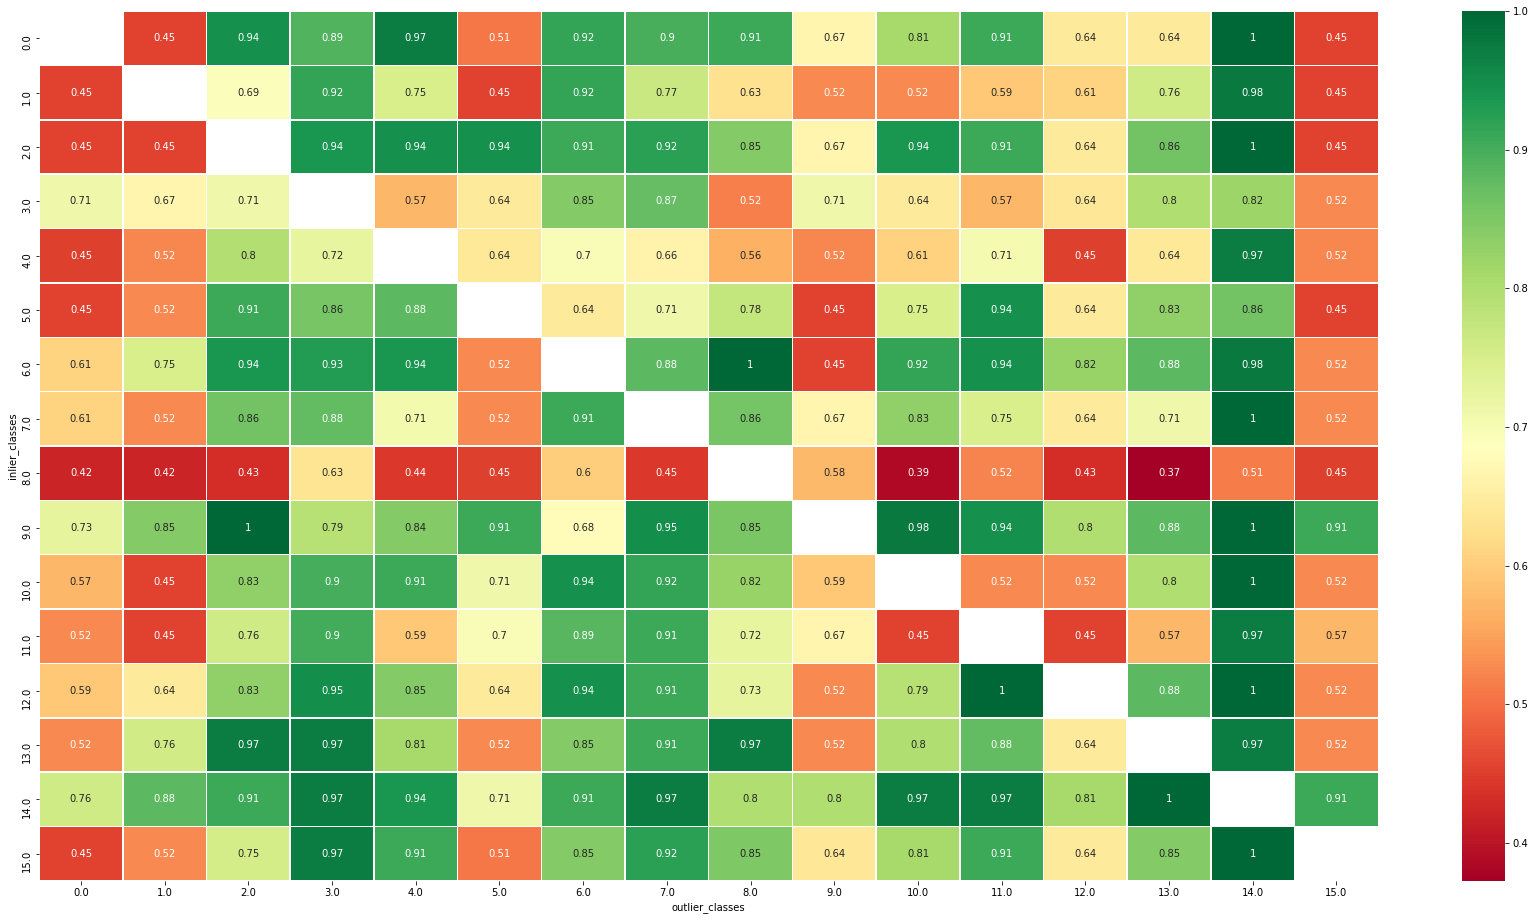

In [51]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"


data_path = "/home/philipp/projects/dad4td/reports/sup_combs_rvl_0003.tsv"
df = pd.read_csv(data_path, sep="\t")

df["inlier_classes"] = df["inlier_classes"].map(lambda x: int(x.strip("[]")))
df["outlier_classes"] = df["outlier_classes"].map(lambda x: int(x.strip("[]")))
df = df.where(df.data == data).dropna()

cols = ["f1_macro", "inlier_classes", "outlier_classes"]
df = df[cols]
group_cols = ["inlier_classes", "outlier_classes"]
df = df.groupby(group_cols, as_index=False).mean()
#df = pd.DataFrame(df.f1_macro, index=df.inlier_classes, columns=df.outlier_classes)
df = df.pivot_table(columns='outlier_classes', index='inlier_classes', values='f1_macro')
print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

In [47]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
score_data = "test"


data_path = "/home/philipp/projects/dad4td/reports/sup_combs_rvl_0003.tsv"
df = pd.read_csv(data_path, sep="\t")
df

,Unnamed: 0,contamination,data,f1_macro,in_f1,in_prec,in_rec,inlier_classes,labeled_data,n_oe,out_f1,out_prec,out_rec,outlier_classes,seed,test_size,use_ivis
0,0,0.166667,train,1.000000,1.000000,1.000000,1.0,[0],1.0,0.0,1.0,1.0,1.0,[1],42.0,0.2,1.0
1,1,0.166667,test,0.454545,0.909091,0.833333,1.0,[0],1.0,0.0,0.0,0.0,0.0,[1],42.0,0.2,1.0
2,2,0.166667,train,1.000000,1.000000,1.000000,1.0,[0],1.0,0.0,1.0,1.0,1.0,[1],43.0,0.2,1.0
3,3,0.166667,test,0.454545,0.909091,0.833333,1.0,[0],1.0,0.0,0.0,0.0,0.0,[1],43.0,0.2,1.0
4,4,0.166667,train,1.000000,1.000000,1.000000,1.0,[0],1.0,0.0,1.0,1.0,1.0,[1],44.0,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,0.166667,test,1.000000,1.000000,1.000000,1.0,[15],1.0,0.0,1.0,1.0,1.0,[14],42.0,0.2,1.0
1436,1436,0.166667,train,1.000000,1.000000,1.000000,1.0,[15],1.0,0.0,1.0,1.0,1.0,[14],43.0,0.2,1.0
1437,1437,0.166667,test,1.000000,1.000000,1.000000,1.0,[15],1.0,0.0,1.0,1.0,1.0,[14],43.0,0.2,1.0
1438,1438,0.166667,train,1.000000,1.000000,1.000000,1.0,[15],1.0,0.0,1.0,1.0,1.0,[14],44.0,0.2,1.0


<Figure size 2160x1152 with 0 Axes>